<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [19]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [22]:
pip install BeautifulSoup4

  Using cached https://files.pythonhosted.org/packages/cb/a1/c698cf319e9cfed6b17376281bd0efc6bfc8465698f54170ef60a485ab5d/beautifulsoup4-4.8.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/94/03c0f04471fc245d08d0a99f7946ac228ca98da4fa75796c507f61e688c2/soupsieve-1.9.5-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [23]:
from bs4 import BeautifulSoup
import requests

In [25]:
import pandas as pd
df_sh = pd.read_csv('job_listings.csv')

In [28]:
df_sh['description'] = [BeautifulSoup(description).get_text() for description in df_sh['description']]

In [30]:
df_sh.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


In [31]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [33]:
# Toeknizer Pipe

tokens = []

"""Make them tokens"""

for doc in tokenizer.pipe(df_sh['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
df_sh['tokens'] = tokens

In [34]:
df_sh.head()

,Unnamed: 0,description,title,tokens
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist,"[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

#create the transformer
count = CountVectorizer()

#build vocab
count.fit(df_sh)

#transform text
dtm = count.transform(df_sh)

In [36]:
print(dtm) #document to matrix

  (0, 3)	1
  (1, 0)	1
  (2, 1)	1
  (3, 2)	1


In [37]:
dtm.todense()

matrix([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]])

In [42]:
# Get word Counts for each document

dtm = pd.DataFrame(dtm.todense(), columns=count.get_feature_names())
dtm

,description,title,tokens,unnamed
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0


/Users/hotstuff/opt/anaconda3/envs/U4-S1-NLP-DS9/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


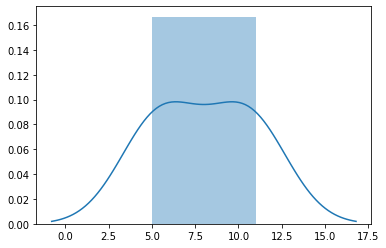

In [43]:
doc_len = [len(doc) for doc in df_sh]
import seaborn as sns
sns.distplot(doc_len);

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df_sh)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,description,title,tokens,unnamed
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0


In [45]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [46]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=1,
                        min_df=.1,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df_sh) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,0,description,title,token,unnamed,unnamed 0
0,0.57735,0.0,0.0,0.0,0.57735,0.57735
1,0.00000,1.0,0.0,0.0,0.00000,0.00000
2,0.00000,0.0,1.0,0.0,0.00000,0.00000
3,0.00000,0.0,0.0,1.0,0.00000,0.00000


In [47]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=4, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=4, p=2, radius=1.0)

In [48]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356]]),
 array([[0, 3, 2, 1]]))

In [49]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[2]])

(array([[0.        , 1.41421356, 1.41421356, 1.41421356]]),
 array([[2, 0, 3, 1]]))

In [50]:
text = ["""
Although there is quite a lot of overlap between data scientists and 
data engineers, their roles are not to be confused. A data engineer is 
responsible for making sure that data scientists have all the data 
that we need and that we get it in a timely manner, said Cheng. 
As Vik Paruchuri wrote on DataQuest, 'Data engineers are responsible
for constructing data pipelines and often have to use complex tools
and techniques to handle data at scale. He continued: 
Unlike [data science], data engineering leans a lot more towards 
a software development skill set. Data scientists really depend on 
data engineers, Cheng told Business Insider, because we need the 
data processed, and we need it available in a way that we can get to 
it without waiting hours. So they build tools and process the data in a way 
that allows us to do that.
"""]

In [51]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(text)

In [52]:
new

<1x6 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [53]:
nn.kneighbors(new.todense())

(array([[1., 1., 1., 1.]]), array([[0, 1, 2, 3]]))

In [54]:
df_sh['description'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [ ]:
## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 